In [1]:
import numpy as np
import matplotlib.pyplot as plt

from nd import LNN
from nd.plot_utils import eigenvalue_analysis
from sklearn.linear_model import LinearRegression

In [2]:
n_samples = 500
lower_bound = 10
upper_bound = 5000
s = 0.01 # stimulus

In [ ]:
# case 1: kw = 1
Ns, eigenvalues1, cosine_angles1, traces1, fpr_norms1, fishers1 = \
    eigenvalue_analysis(n_samples=n_samples,
                        lower_bound=lower_bound,
                        upper_bound=upper_bound,
                        kw=1,
                        verbose=False)

In [ ]:
# case 2: kw = 2
Ns, eigenvalues2, cosine_angles2, traces2, fpr_norms2, fishers2 = \
    eigenvalue_analysis(n_samples=n_samples,
                        lower_bound=lower_bound,
                        upper_bound=upper_bound,
                        kw=2,
                        verbose=False)

In [ ]:
# case 3: kw = 3
Ns, eigenvalues3, cosine_angles3, traces3, fpr_norms3, fishers3 = \
    eigenvalue_analysis(n_samples=n_samples,
                        lower_bound=lower_bound,
                        upper_bound=upper_bound,
                        kw=3,
                        verbose=False)

## Growth of eigenvalues

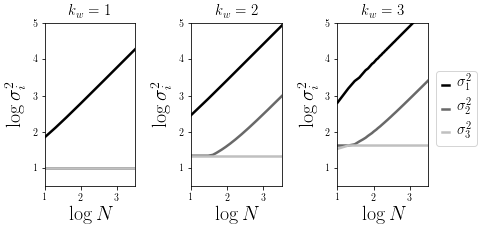

In [95]:
fig, axes = plt.subplots(1, 3, figsize=(7, 3))

colors = ['black', 'dimgray', 'silver']

for idx in range(3):
    axes[0].plot(np.log10(Ns), np.log10(eigenvalues1[np.arange(n_samples), Ns - 1 - idx]),
                 color=colors[idx],
                 linewidth=2.5)
    axes[1].plot(np.log10(Ns), np.log10(eigenvalues2[np.arange(n_samples), Ns - 1 - idx]),
                 color=colors[idx],
                 linewidth=2.5)
    axes[2].plot(np.log10(Ns), np.log10(eigenvalues3[np.arange(n_samples), Ns - 1 - idx]),
                 color=colors[idx],
                 linewidth=2.5,
                 label='$\sigma_{%s}^2$' %(idx+1))

for ax in axes:
    ax.set_xlabel(r'$\log N$', fontsize=20)
    ax.set_ylabel(r'$\log \sigma_i^2$', fontsize=20)
    ax.set_xlim([1, 3.5])
    ax.set_ylim([0.5, 5])
    ax.set_aspect('equal')
    
axes[2].legend(
    bbox_to_anchor=(1, 0.75),
    handlelength=0.5,
    handletextpad=0.5,
    prop={'size': 15},
    loc=2)

axes[0].set_title(r'$k_w=1$', fontsize=15)
axes[1].set_title(r'$k_w=2$', fontsize=15)
axes[2].set_title(r'$k_w=3$', fontsize=15)
plt.subplots_adjust(wspace=0.50)
plt.savefig('figureS1a.pdf', bbox_inches='tight')

## Growth of cosine-angle ratios

In [58]:
with np.errstate(divide='ignore', invalid='ignore'):
    ratios1 = cosine_angles1 / eigenvalues1
    ratios2 = cosine_angles2 / eigenvalues2
    ratios3 = cosine_angles3 / eigenvalues3

np.nan_to_num(ratios1, copy=False)
np.nan_to_num(ratios2, copy=False)
np.nan_to_num(ratios3, copy=False);

In [59]:
ratio_sums1 = np.zeros(Ns.size)
ratio_sums2 = np.zeros(Ns.size)
ratio_sums3 = np.zeros(Ns.size)

for N_idx, N in enumerate(Ns):
    ratio_sums1[N_idx] = np.sum(ratios1[N_idx][:N-1])
    ratio_sums2[N_idx] = np.sum(ratios2[N_idx][:N-2])
    ratio_sums3[N_idx] = np.sum(ratios3[N_idx][:N-2])

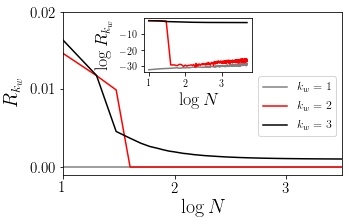

In [97]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
ax.plot(np.log10(Ns), ratio_sums1, color='gray', label=r'$k_w=1$')
ax.plot(np.log10(Ns), ratio_sums2, color='red', label=r'$k_w=2$')
ax.plot(np.log10(Ns), ratio_sums3, color='black', label=r'$k_w=3$')

inset = fig.add_axes([0.35, 0.6, 0.3, 0.25])

inset.plot(np.log10(Ns), np.log10(ratio_sums1), color='gray')
inset.plot(np.log10(Ns), np.log10(ratio_sums2), color='red')
inset.plot(np.log10(Ns), np.log10(ratio_sums3), color='black')

ax.set_xlim([1, 3.5])
ax.set_ylim([-0.001, 0.02])
ax.set_xticks([1, 2.0, 3.0])
ax.set_yticks([0, 0.01, 0.02])
ax.tick_params(labelsize=15)

# labels
ax.set_xlabel(r'$\log N$', fontsize=20)
inset.set_xlabel(r'$\log N$', fontsize=18)
ax.set_ylabel(r'$R_{k_w}$', fontsize=20)
inset.set_ylabel(r'$\log R_{k_w}$', fontsize=18)

ax.legend(
    loc=4,
    bbox_to_anchor=(1.0, 0.20),
    prop={'size': 12})
plt.savefig('figureS1b.pdf', bbox_inches='tight')